<a href="https://colab.research.google.com/github/ola338/Machine-learning-projects/blob/main/mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


(-0.5, 27.5, 27.5, -0.5)

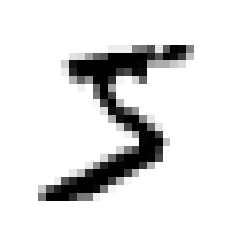

In [5]:
digit = X[0]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image, cmap=mpl.cm.binary)
plt.axis('off')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print('Train set shape: ', X_train.shape[0],
      '\nTest set shape: ', X_test.shape[0]
      )

Train set shape:  56000 
Test set shape:  14000


In [8]:
from sklearn.neighbors import KNeighborsClassifier
KNmodel = KNeighborsClassifier(n_neighbors=5)
KNmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
scores = cross_val_score(KNmodel, X_train_scaled, y_train, scoring="accuracy", cv=3)
scores

array([0.93801896, 0.9394118 , 0.94208722])

In [11]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
scores = cross_val_score(KNmodel, X_train_min_max_scaled, y_train, scoring="accuracy", cv=3)
scores

array([0.96614346, 0.96823271, 0.96903461])

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

param_grid = [
    {'n_neighbors': [3, 5, 7]
     #'weights': ['distance', 'uniform'], 
     #'p': [1, 2]
     }
    ]

grid_search = GridSearchCV(KNmodel, param_grid, cv=3, 
                           scoring='f1_weighted', 
                           return_train_score=True)

grid_search.fit(X_train_min_max_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7]}], return_train_score=True,
             scoring='f1_weighted')

In [15]:
cv_results = grid_search.cv_results_

for mean_test_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print('f1-score %.3f' % mean_test_score, params)

best_KNmodel = grid_search.best_estimator_
best_KNmodel

f1-score 0.967 {'n_neighbors': 3}
f1-score 0.968 {'n_neighbors': 5}
f1-score 0.967 {'n_neighbors': 7}


KNeighborsClassifier()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

X_test_scaled = min_max_scaler.fit_transform(X_test)
y_pred = best_KNmodel.predict(X_test_scaled)

conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[1375,    1,    0,    0,    0,    1,    3,    0,    0,    1],
       [   0, 1564,    5,    1,    1,    0,    1,    3,    0,    0],
       [  12,   14, 1335,    4,    2,    0,    4,   24,    3,    0],
       [   1,    2,    7, 1386,    0,   12,    2,    9,    6,    3],
       [   2,   15,    1,    0, 1306,    0,    5,    1,    0,   35],
       [   6,    3,    1,    7,    1, 1217,   17,    2,    3,    6],
       [   7,    3,    0,    0,    1,    8, 1355,    0,    1,    0],
       [   1,   17,    3,    0,    2,    1,    0, 1423,    0,   12],
       [   8,   11,    1,   22,    4,   29,    4,    4, 1276,    6],
       [   2,    8,    1,   13,   11,    1,    1,   13,    2, 1339]])